In [26]:
import numpy as np
from numpy import linalg
from matplotlib import pyplot as plt

In [3]:
from sklearn.datasets import load_digits
images, labels = load_digits(2, return_X_y=True)
# Labeled training set
training_images = images[:300]
training_labels = labels[:300]
# Labeled test set
test_images = images[300:]
test_labels = labels[300:]

In [16]:
# must set one of numPC or accuracy
def pca(X, dim=None, accuracy=None):
    u, d, v = linalg.svd(X)
    if accuracy is not None:
        energy = linalg.norm(X)**2
        sumEig = 0
        for i, eigval in enumerate(list(d)):
            sumEig += eigval**2
            if sumEig / energy >= accuracy:
                dim = i + 1
                break
    U = u[:, :dim]
    return U

# k-NN Classification using 2-D Features

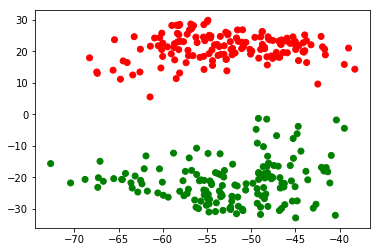

In [41]:
features = pca(training_images.T, dim=2)
training_features = training_images @ features

plt.scatter(training_features[:,0], training_features[:,1], c=['r' if label == 0 else 'g' for label in training_labels])
plt.show()

In [69]:
from heapq import *

def knn_predict(image, k, features, training_features, training_labels):
    feat = image @ features
    heap = []
    for point, label in zip(training_features, training_labels):
        dist = linalg.norm(feat-point)
        if len(heap) < k:
            heappush(heap, (-dist, label))
        elif dist < -heap[0][0]:
            heapreplace(heap, (-dist, label))
    numOnes = sum([dist_label[1] for dist_label in heap])
    return int(numOnes > k // 2), feat

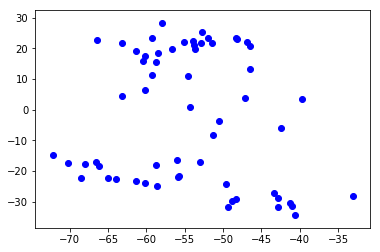

Error is 0.0


In [71]:
k = 5
misclassified = 0
for image, label in zip(test_images, test_labels):
    pred_label, feat = knn_predict(image, k, features, training_features, training_labels)
    col = 'b'
    if pred_label != label:
        col = 'k'
        misclassified += 1
    plt.scatter(feat[0], feat[1], c=col)
plt.show()
print('Error is', misclassified / len(test_labels))

# k-NN Classification using Higher-Dimensional Features

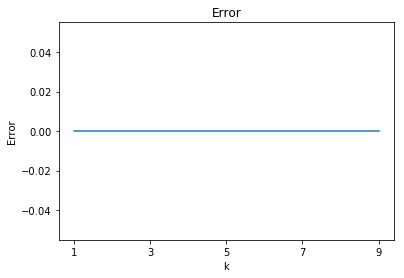

In [78]:
features = pca(training_images.T, accuracy=0.95)
training_features = training_images @ features

kvals = list(range(1, 10, 2))
errors = []
for k in kvals:
    misclassified = 0
    for image, label in zip(test_images, test_labels):
        pred_label, feat = knn_predict(image, k, features, training_features, training_labels)        
        if pred_label != label:
            misclassified += 1
    errors.append(misclassified / len(test_labels))

plt.plot(kvals, errors)
plt.xticks(kvals)
plt.title('Error')
plt.xlabel('k')
plt.ylabel('Error')
plt.show()